In [1]:
import numpy as np
import h5py
from sklearn.manifold import Isomap
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import corner
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
file = h5py.File(r"C:\Users\Admin\OneDrive\Desktop\sample_2e7_design_precessing_higherordermodes_3detectors.h5",'r')
data = []

for idx, name in enumerate(list(file.keys())):
    data.append(file[name][0:1000])

data = pd.DataFrame(np.transpose(data))
data.columns = list(file.keys())
data

,chi1x,chi1y,chi1z,chi2x,chi2y,chi2z,dec,det,iota,mtot,psi,q,ra,snr,z
0,-0.307201,0.276165,-0.430760,-0.161114,-0.092334,-0.414647,-0.329671,0.0,1.809310,906.803562,1.286031,0.624780,-3.116784,0.822509,2.139659
1,-0.734712,-0.498493,-0.298162,0.057532,-0.844992,0.014708,0.526740,0.0,0.820820,59.102112,0.934308,0.986650,1.360291,1.093237,2.438707
2,-0.057831,-0.703796,-0.354512,-0.215538,0.016323,0.130543,0.315799,0.0,2.008206,44.602750,1.535520,0.286199,0.079973,1.305398,1.869461
3,0.015260,-0.202467,-0.492768,-0.237033,-0.365363,-0.876192,0.432105,0.0,2.018398,534.378032,3.064086,0.538882,-1.780558,9.112974,0.428061
4,-0.016731,0.007848,0.005007,0.147519,0.231879,0.086716,-0.458711,1.0,2.037363,573.821705,0.752211,0.846310,2.789289,17.525534,0.772609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.576429,-0.645197,0.106358,0.779329,0.480224,0.302788,-0.164741,0.0,1.784171,905.125763,2.367827,0.466528,-0.034750,0.993533,3.260640
996,-0.134131,0.205700,-0.107687,-0.046215,0.361217,-0.813627,-1.245679,0.0,2.560637,264.862843,1.422802,0.642199,2.816555,3.599715,3.244858
997,0.216536,-0.100850,0.299994,0.088451,0.136617,-0.121935,1.036102,1.0,0.415292,408.083801,3.102616,0.756706,-1.027694,20.986058,1.004410
998,0.274411,-0.156249,-0.064642,0.302982,0.366175,0.325817,0.919502,0.0,2.010860,588.336562,3.114282,0.692634,-2.490513,2.113289,2.580256


A try to visualize the correlation between SNR and other parameters.

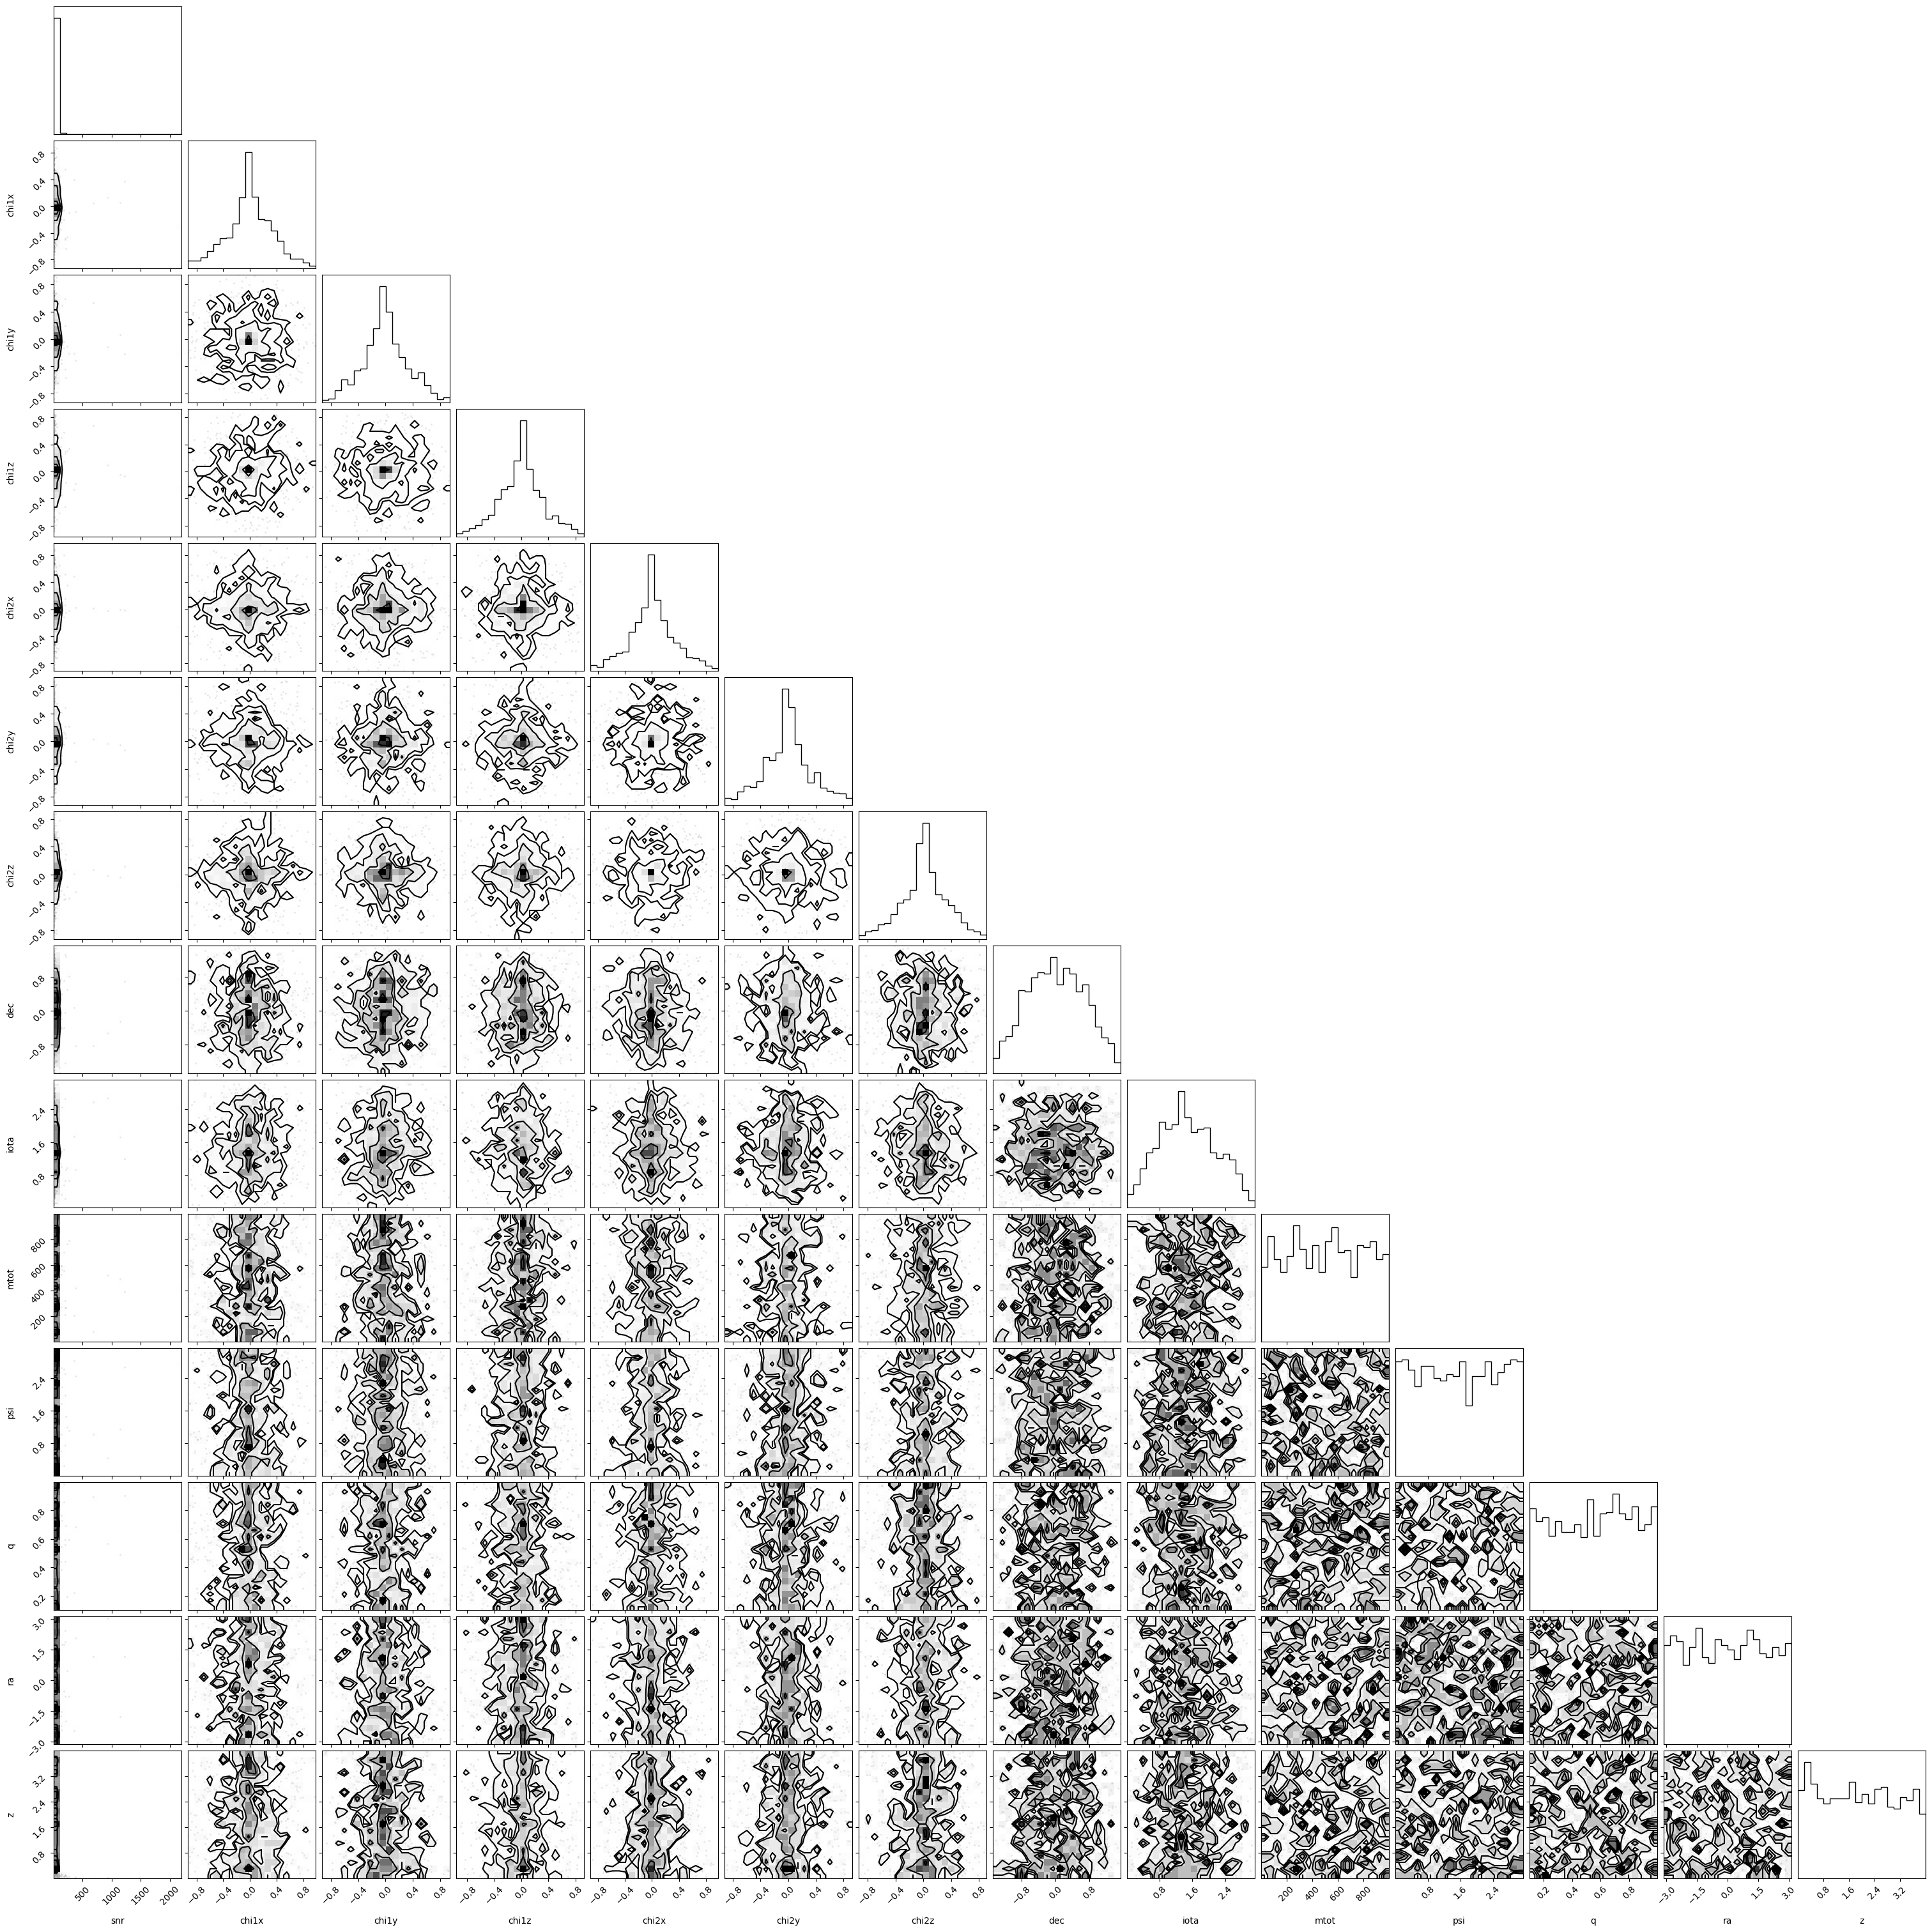

In [3]:
corner.corner(np.array([data['snr'], data['chi1x'], data['chi1y'], data['chi1z'], data['chi2x'], data['chi2y'], data['chi2z'], data['dec'], data['iota'], data['mtot'], data['psi'], data['q'], data['ra'], data['z']]).T, labels=['snr', 'chi1x', 'chi1y', 'chi1z', 'chi2x',	'chi2y', 'chi2z', 'dec', 'iota', 'mtot', 'psi', 'q', 'ra', 'z']);

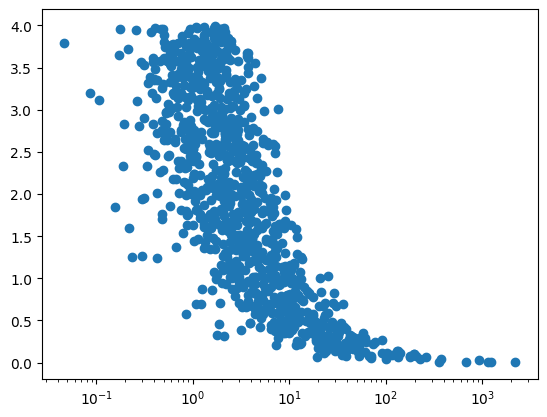

In [4]:
plt.scatter(data['snr'], data['z'])
plt.xscale('log')

I selected, by eye, some features that seems to influence the SNR

In [5]:
attributes = ['chi1x', 'chi1y', 'chi1z', 'chi2x', 'chi2y', 'chi2z', 'dec','iota', 'mtot', 'psi', 'q', 'ra', 'z']
attributes_5 = ['iota', 'mtot', 'psi', 'q','z']
attributes_3 = ['iota', 'mtot', 'z']

Let's try a PCA reduction on all the features

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[attributes], data['det'], test_size=0.3, random_state=42)

Explained fractional variance of data encapsulated in the eigenvalues: [0.09023658 0.08827026 0.08675158 0.08223845 0.08105495 0.07777018
 0.07701919 0.07562953 0.07346956 0.07025562 0.06930513]


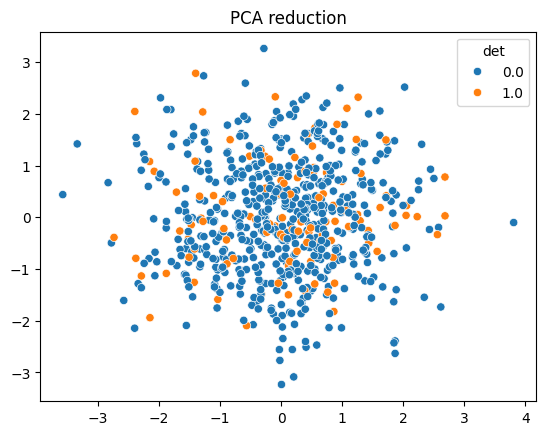

In [9]:
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(data[attributes])

pca = PCA(n_components = 11)

X_scaled_pca = pca.fit_transform(X_scaled)

X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca = train_test_split(X_scaled_pca, data['det'], test_size=0.3, random_state=42)

evals = pca.explained_variance_ratio_ 
print('Explained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))

sns.scatterplot(x = X_train_scaled_pca[:, 0], y = X_train_scaled_pca[:, 1], hue = y_train_scaled_pca)
plt.title('PCA reduction');

From the explained fractional variance we can se that the resulting reduction has not given useful results.

In [10]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(data[attributes_5], data['det'], test_size=0.3, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data[attributes_3], data['det'], test_size=0.3, random_state=42)

# Bagged Decision Tree

### Full dataset

In [11]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(DecisionTreeClassifier(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train, y_train)
d_opt = grid.best_params_
print(d_opt)

{'max_depth': 1}


C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth = d_opt['max_depth'], random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

C = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = C.ravel()
completeness = tp/(tp+fn)
contamination = fp/(tp+fp)
accuracy = accuracy_score(y_test, y_pred)

print('completeness = ' + str(completeness))
print('contamination = ' + str(contamination))
print('accuracy = ' + str(accuracy))

completeness = 0.9090909090909091
contamination = 0.21568627450980393
accuracy = 0.95


### PCAed data

In [13]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(DecisionTreeClassifier(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train_scaled_pca, y_train_scaled_pca)
d_opt = grid.best_params_
print(d_opt)

{'max_depth': 2}


C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth = d_opt['max_depth'], random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train_scaled_pca, y_train_scaled_pca)

y_pred = bag_clf.predict(X_test_scaled_pca)

C = confusion_matrix(y_test_scaled_pca, y_pred)
tn, fp, fn, tp = C.ravel()
completeness = tp/(tp+fn)
contamination = fp/(tp+fp)
accuracy = accuracy_score(y_test_scaled_pca, y_pred)

print('completeness = ' + str(completeness))
print('contamination = ' + str(contamination))
print('accuracy = ' + str(accuracy))

completeness = 0.045454545454545456
contamination = 0.0
accuracy = 0.86


### Less Features

In [15]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(DecisionTreeClassifier(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train_5, y_train_5)
d_opt = grid.best_params_
print(d_opt['max_depth'])

6


C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

In [16]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth = d_opt['max_depth'], random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train_5, y_train_5)

y_pred = bag_clf.predict(X_test_5)

C = confusion_matrix(y_test_5, y_pred)
tn, fp, fn, tp = C.ravel()
completeness = tp/(tp+fn)
contamination = fp/(tp+fp)
accuracy = accuracy_score(y_test_5, y_pred)

print('completeness = ' + str(completeness))
print('contamination = ' + str(contamination))
print('accuracy = ' + str(accuracy))

completeness = 0.9545454545454546
contamination = 0.19230769230769232
accuracy = 0.96


In [17]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(DecisionTreeClassifier(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train_3, y_train_3)
d_opt = grid.best_params_
print(d_opt)

{'max_depth': 6}


C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth = d_opt['max_depth'], random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train_3, y_train_3)

y_pred = bag_clf.predict(X_test_3)

C = confusion_matrix(y_test_3, y_pred)
tn, fp, fn, tp = C.ravel()
completeness = tp/(tp+fn)
contamination = fp/(tp+fp)
accuracy = accuracy_score(y_test_3, y_pred)

print('completeness = ' + str(completeness))
print('contamination = ' + str(contamination))
print('accuracy = ' + str(accuracy))

completeness = 0.9318181818181818
contamination = 0.16326530612244897
accuracy = 0.9633333333333334


# Random Forest

Here I'll make a regression on the SNR and putting the threshold at SNR = 12

### Full Dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data[attributes], data['snr'], test_size=0.3, random_state=42)

X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca = train_test_split(X_scaled_pca, data['snr'], test_size=0.3, random_state=42)

In [20]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(RandomForestRegressor(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train, y_train)
d_opt = grid.best_params_
print(d_opt)

C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

{'max_depth': 19}


In [21]:
model = RandomForestRegressor(max_depth = d_opt['max_depth'], random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#I define a threshold for the detectability.
y_pred_class = (y_pred > 12).astype(int)
y_test_class = (y_test > 12).astype(int)

C = confusion_matrix(y_test_class, y_pred_class)
tn, fp, fn, tp = C.ravel()
completeness = tp/(tp+fn)
contamination = fp/(tp+fp)
accuracy = accuracy_score(y_test_class, y_pred_class)

print('completeness = ' + str(completeness))
print('contamination = ' + str(contamination))
print('accuracy = ' + str(accuracy))

completeness = 0.9772727272727273
contamination = 0.21818181818181817
accuracy = 0.9566666666666667


### PCAed data

In [22]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(RandomForestRegressor(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train_scaled_pca, y_train_scaled_pca)
d_opt = grid.best_params_
print(d_opt)

C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

{'max_depth': 1}


In [23]:
model = RandomForestRegressor(max_depth = d_opt['max_depth'], random_state=42)
model.fit(X_train_scaled_pca, y_train_scaled_pca)

y_pred = model.predict(X_test_scaled_pca)

#I define a threshold for the detectability.
y_pred_class = (y_pred > 12).astype(int)
y_test_class = (y_test_scaled_pca > 12).astype(int)

C = confusion_matrix(y_test_class, y_pred_class)
tn, fp, fn, tp = C.ravel()
completeness = tp/(tp+fn)
contamination = fp/(tp+fp)
accuracy = accuracy_score(y_test_class, y_pred_class)

print('completeness = ' + str(completeness))
print('contamination = ' + str(contamination))
print('accuracy = ' + str(accuracy))

completeness = 0.8181818181818182
contamination = 0.6814159292035398
accuracy = 0.7166666666666667


### Less Features

In [24]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(data[attributes_5], data['snr'], test_size=0.3, random_state=42)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data[attributes_3], data['snr'], test_size=0.3, random_state=42)

In [25]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(RandomForestRegressor(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train_5, y_train_5)
d_opt = grid.best_params_
print(d_opt['max_depth'])

C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

11


In [26]:
model = RandomForestRegressor(max_depth = d_opt['max_depth'], random_state=42)
model.fit(X_train_5, y_train_5)

y_pred = model.predict(X_test_5)

#I define a threshold for the detectability.
y_pred_class = (y_pred > 12).astype(int)
y_test_class = (y_test_5 > 12).astype(int)

C = confusion_matrix(y_test_class, y_pred_class)
tn, fp, fn, tp = C.ravel()
completeness = tp/(tp+fn)
contamination = fp/(tp+fp)
accuracy = accuracy_score(y_test_class, y_pred_class)

print('completeness = ' + str(completeness))
print('contamination = ' + str(contamination))
print('accuracy = ' + str(accuracy))

completeness = 0.9772727272727273
contamination = 0.24561403508771928
accuracy = 0.95


In [27]:
depth = np.arange(0, 21)
K=10

grid = GridSearchCV(RandomForestRegressor(), {'max_depth': depth}, scoring = 'neg_root_mean_squared_error', cv = K) # Try each depth with K-folds
grid.fit(X_train_3, y_train_3)
d_opt = grid.best_params_
print(d_opt)

C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\Dynamics\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constra

{'max_depth': 15}


In [28]:
model = RandomForestRegressor(max_depth = d_opt['max_depth'], random_state=42)
model.fit(X_train_3, y_train_3)

y_pred = model.predict(X_test_3)

#I define a threshold for the detectability.
y_pred_class = (y_pred > 12).astype(int)
y_test_class = (y_test_3 > 12).astype(int)

C = confusion_matrix(y_test_class, y_pred_class)
tn, fp, fn, tp = C.ravel()
completeness = tp/(tp+fn)
contamination = fp/(tp+fp)
accuracy = accuracy_score(y_test_class, y_pred_class)

print('completeness = ' + str(completeness))
print('contamination = ' + str(contamination))
print('accuracy = ' + str(accuracy))

completeness = 0.9772727272727273
contamination = 0.23214285714285715
accuracy = 0.9533333333333334


# Conclusions

Looking at the results obtained, we can say that applying a PCA reduction on our data is worsening our classification. Applying a regression on the snr values instead of a classifier on the detectability, increases both completeness and contamination. In the case of the Decision Tree classifier, reducing the number of features has improved the accuracy of the classification, and in both DTC and RFR, it has improved the completeness of the classification.